<a href="https://colab.research.google.com/github/VishalMoradia/ML-Practice/blob/main/AUC_ROC/EvaluatingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('/heart-disease.csv')


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']

model = RandomForestClassifier()
mean_score = np.mean(cross_val_score(model, X, y, cv = 5))
print(f"heart disease classifier 'cross-validated' accuracy: {(mean_score) *100:.2f}%")

heart disease classifier 'cross-validated' accuracy: 81.16%


### Area under Curve (AUC)
###Receiver Operating Characteristics (ROC)

#### ROC - Compares `True Positive rate` (tpr) vs `False Positive rate` (fpr)
* True Positive - Model predicts 1 and truth is 1
* False positive - Model predicts 1 and truth is 0
* True negative - Model predicts 0 and truth is 0
* False negative - Model predicts 1 and truth is 0

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
from sklearn.metrics import roc_curve


model.fit(X_train, y_train)

# Make predictions with probabilities 

y_prob = model.predict_proba(X_test)

y_prob[:10]

array([[0.89, 0.11],
       [0.94, 0.06],
       [0.24, 0.76],
       [0.78, 0.22],
       [0.35, 0.65],
       [0.93, 0.07],
       [0.49, 0.51],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.59, 0.41]])

In [4]:
# Differentiating between positives and negatives

y_prob_positive = y_prob[:,1]
y_prob_positive

array([0.11, 0.06, 0.76, 0.22, 0.65, 0.07, 0.51, 0.98, 0.89, 0.41, 0.12,
       0.94, 0.97, 0.91, 0.99, 0.52, 0.68, 0.07, 0.14, 0.8 , 0.95, 0.69,
       0.48, 0.28, 0.02, 0.56, 0.86, 0.52, 0.68, 0.89, 0.05, 0.42, 0.92,
       0.39, 0.59, 0.57, 0.87, 0.3 , 0.65, 0.82, 0.4 , 0.64, 0.8 , 0.65,
       0.07, 0.95, 0.03, 0.9 , 0.92, 0.13, 0.74, 0.36, 0.31, 0.99, 0.87,
       0.43, 0.44, 0.38, 0.18, 0.12, 0.34])

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

In [6]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04,
       0.08, 0.16, 0.16, 0.24, 0.24, 0.28, 0.28, 0.36, 0.36, 0.4 , 0.4 ,
       0.44, 0.44, 0.6 , 0.68, 0.72, 0.84, 1.  ])

In [7]:
tpr

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.19444444,
       0.25      , 0.30555556, 0.41666667, 0.47222222, 0.5       ,
       0.58333333, 0.61111111, 0.63888889, 0.66666667, 0.66666667,
       0.69444444, 0.72222222, 0.75      , 0.75      , 0.80555556,
       0.80555556, 0.94444444, 0.94444444, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

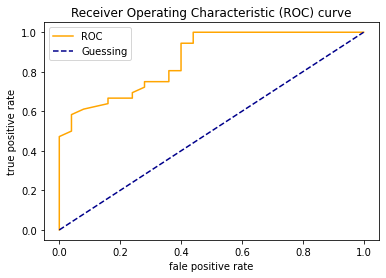

In [8]:
import matplotlib.pyplot as plt


def plot_roc(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr) and true positive rate 
  (tpr) of a model
  """
  # Plot line with no predictive power (baseline)
  plt.plot(fpr, tpr, color = 'Orange', label = 'ROC')
  plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
  plt.xlabel("fale positive rate")
  plt.ylabel('true positive rate')
  plt.title('Receiver Operating Characteristic (ROC) curve')
  plt.legend()
  plt.show()

plot_roc(fpr, tpr)


In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_positive)

0.865


#### What to remember in nutshell for ROC and AUC:
* ROC and AUC are both evaluation metrics for binary classification models. 
  (Whether one event happens or the other)
* ROC curve compares the false positive rate vs true positive rate at diff.
  classification thresholds.
* AUC metrics tells us how well model is at choosing between classes. Perfect
  model will have an AUC score of 1. 

### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [11]:
confusion_matrix(y_test, y_preds)

array([[18,  7],
       [ 9, 27]])

In [12]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, 
            rownames = ['Actual Labels'],
            colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,18,7
1,9,27


##### What we can see from the confusion matrix given above:
* There are 13 values which fall under false positive
* There are 17 true negatives and 27 true positives
* There are 4 values which are false negative

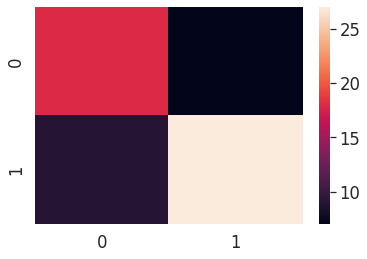

In [13]:
# Making confusion matrix more visual with Seaborn's Library heatmap()


import seaborn as sns

# set the font scale 

sns.set(font_scale = 1.5)

# create the confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

In [15]:
model

RandomForestClassifier()

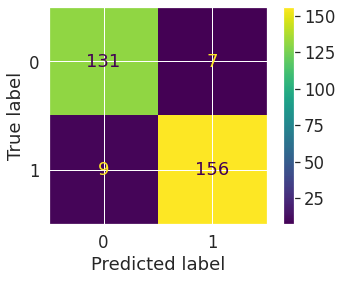

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model, X = X, y = y)

In [18]:
# y_preds are the values of the target variable that model has predicted.

y_preds

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [19]:
# y_test are the values of the variable that was taken from the data during train_test_split()

y_test

# we compare the y_preds against the y_test to evaluate the accuracy of the model.

207    0
221    0
5      1
266    0
286    0
      ..
270    0
59     1
220    0
176    0
152    1
Name: target, Length: 61, dtype: int64

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds)) # here are comparing the true values (y_test) with the predicted values (y_preds) 

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.79      0.75      0.77        36

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



#### Explanation of the result above:

* `precision` - indicates the proportion of the positive identifications which were actually correct. A model that produces no false positives has the precision of 1.0

* `recall` - Indicates the proportion of actual positives which were correctly classified. Model that produces no false negatives has the recall of 1.0

* `F1 score` - A combination of recall and precision. A perfect model achieves the score of 1.0

* `Support` - The number of samples each metric was calculated on.

* `Accuracy` - Model accuracy. Perfect = 1.0

* `Macro avg.` - Average of recall, f1 and avergae precision.

* `weighted` - Avegrage calculated with rtespect to how many samples there are in each class.

